In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
# from PyEMD import EEMD
import pylab as plt

In [2]:
# assi = np.load("/work/uo1075/u241321/data/eemd_t310_assi_Nordic.npy")
assi  = np.load("/work/uo1075/u241321/data/eemd_t310_assi_Norwegian.npy") # (5,50) mode(input, c1-c4), time

na = np.load("/work/uo1075/u241321/data/eemd_NAO_DJF.npy")   #  
nao = na[2,:]


In [3]:
np.corrcoef(nao, na[1,:]+na[2,:]+na[3,:])[0,1]**2

0.5805779388619087

/tmp/ipykernel_1814658/2669982764.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, assi[2,:], '-', linestyle='solid', color='black', linewidth=7, markersize=10, label = 'Subdecadal component of T')
/tmp/ipykernel_1814658/2669982764.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, assi[1,:]+assi[2,:]+assi[3,:], '-', linestyle='dashed', color='black', linewidth=7, markersize=10, label = 'Upper 310m temperature (T)')
/tmp/ipykernel_1814658/2669982764.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(x, nao, '-', linestyle='solid', color='red', linewidth=7, markersize=10, label = 'NAO'

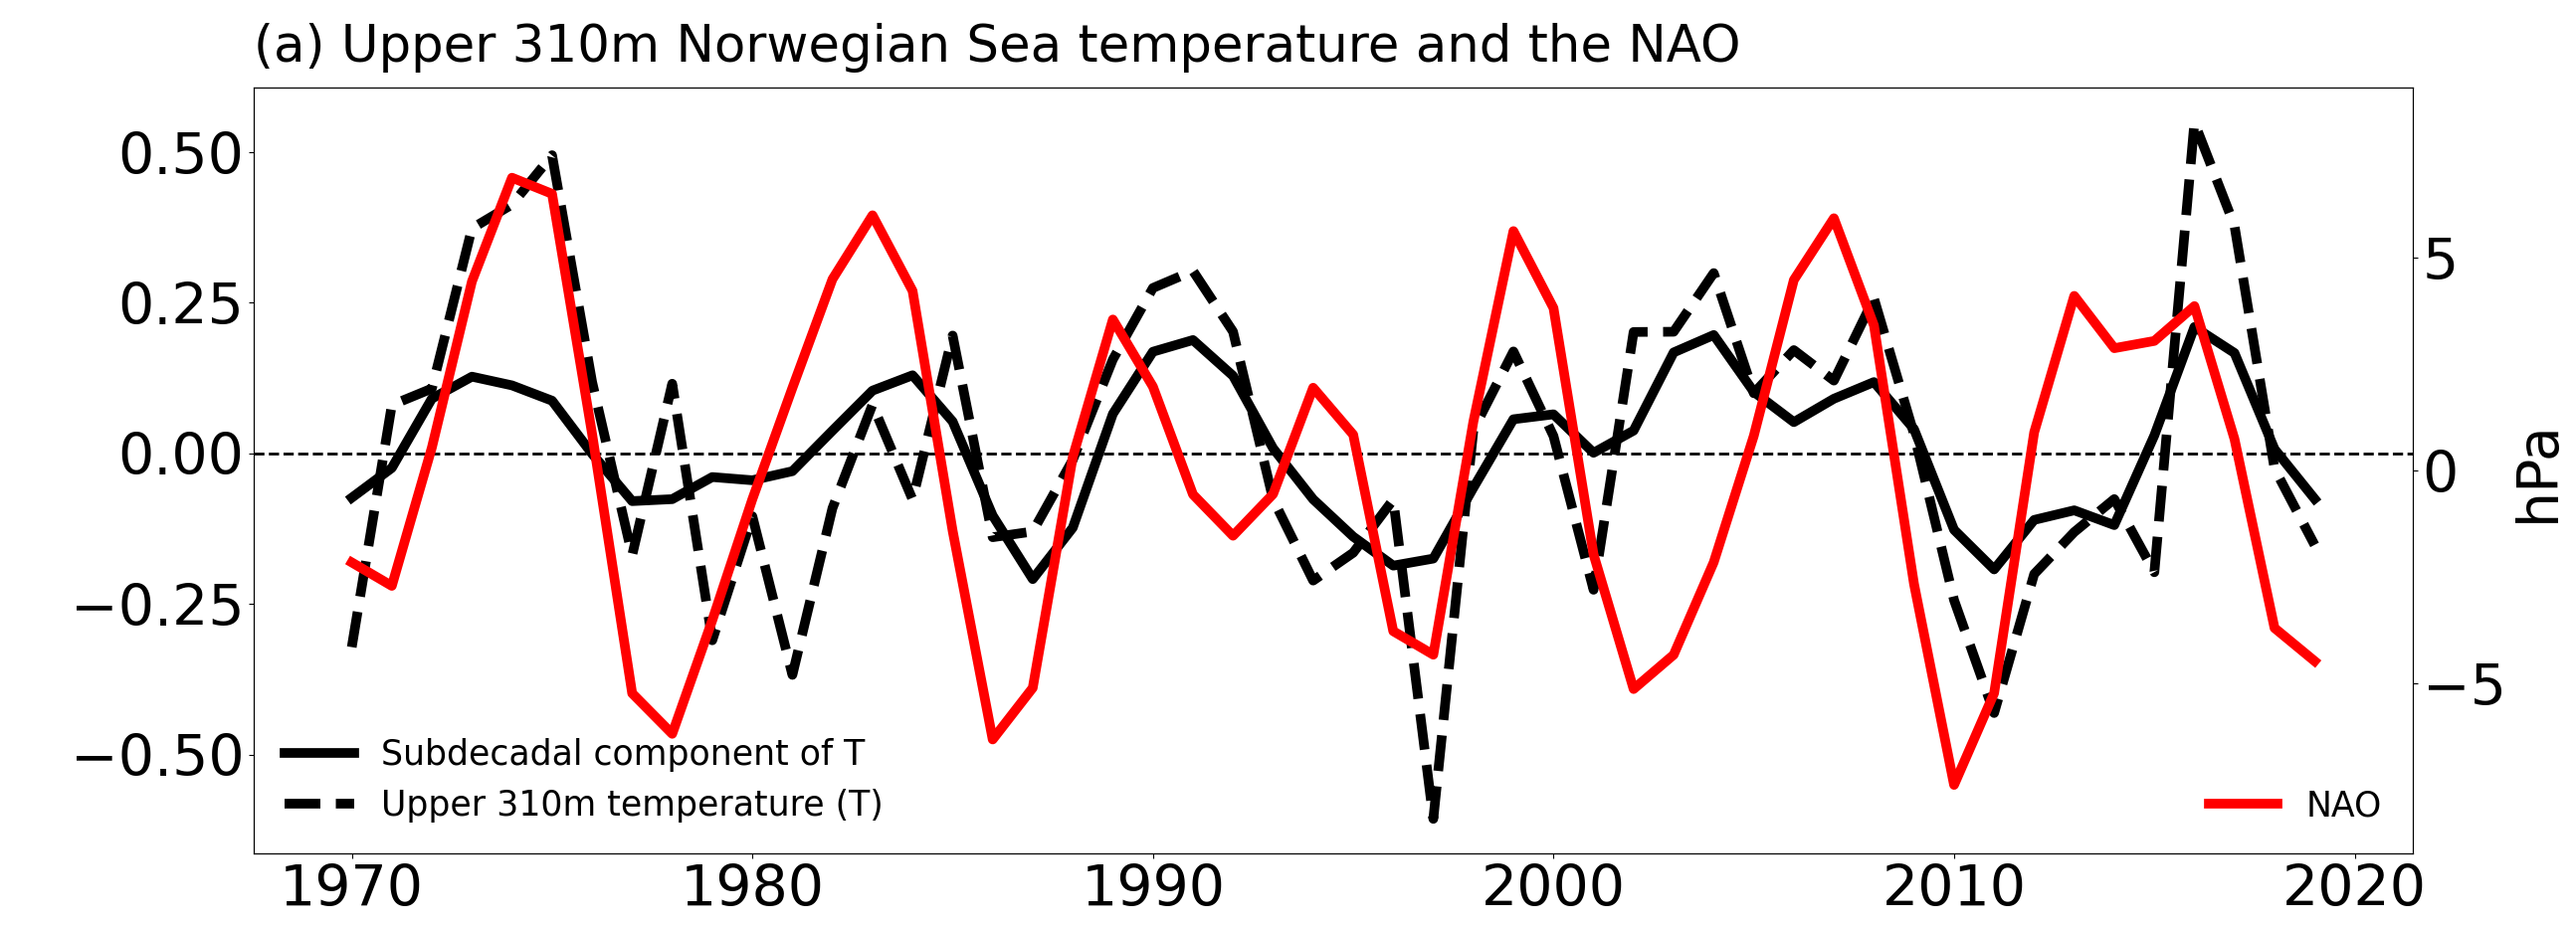

In [16]:


x = np.arange(1970,2020,1)  # starting from difference between 1971 and 1970

fig, ax = plt.subplots(figsize = [28,10])
ax.plot(x, assi[2,:], '-', linestyle='solid', color='black', linewidth=7, markersize=10, label = 'Subdecadal component of T')
ax.plot(x, assi[1,:]+assi[2,:]+assi[3,:], '-', linestyle='dashed', color='black', linewidth=7, markersize=10, label = 'Upper 310m temperature (T)')



ax.set(xlabel='', ylabel=' ',
       title=' ')

ax.set_title('(a) Upper 310m Norwegian Sea temperature and the NAO',size = '37', loc = 'left', pad = 19)
ax.legend(loc='lower left', fontsize='25',edgecolor='white')
ax.axhline(0, linewidth=2, color='black', linestyle= 'dashed')

ax1 = ax.twinx()
ax1.plot(x, nao, '-', linestyle='solid', color='red', linewidth=7, markersize=10, label = 'NAO')
ax1.legend(loc='lower right', fontsize='25',edgecolor='white')
ax1.set(xlabel='', ylabel='hPa',
       title=' ')
ax1.set_ylim(-9, 9) 
# ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
# ax1.plot(x, transport[0:49], '-', linestyle='solid', color='blue', linewidth=5, markersize=10, label = 'Heat transport')
# ax1.legend(loc='upper right', fontsize='18')



plt.rcParams["font.size"] = "41"
plt.show()
fig.savefig('/work/uo1075/u241321/results/p1a_tts.pdf')


/tmp/ipykernel_1814658/3784454605.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([-0.2,0,0.2])
/tmp/ipykernel_1814658/3784454605.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels([-0.2,0,0.2])
/tmp/ipykernel_1814658/3784454605.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_yticklabels([-0.2,0,0.2])


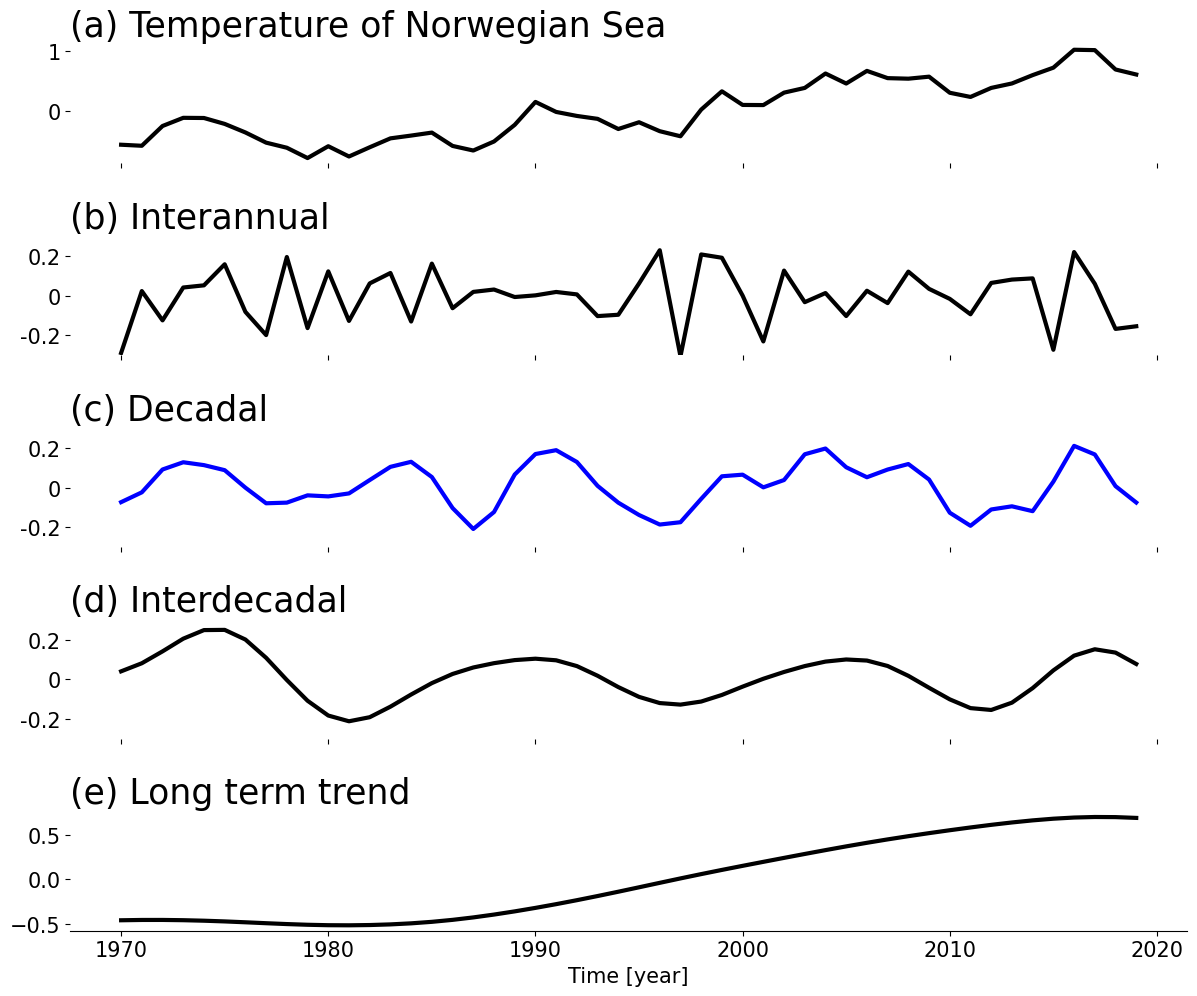

In [6]:
import matplotlib.pyplot as plt
t = np.arange(1970,2020,1)
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(13, 11),sharex=True)
plt.subplots_adjust(hspace=10,wspace =0.15)
y = [-0.2, 0, 0.2]
# y_tick_labels = np.arange(1,10,1)

fontsize = 25
#plot time signal:

axs[0].plot(t, assi[0,:], '-', color='black', linewidth=3, markersize=10, label = '')
# axs[0].plot(t, hind[0,:], '--', color='black', linewidth=2, markersize=10, label = '')
axs[0].set_title("(a) Temperature of Norwegian Sea  ", loc='left', fontsize=fontsize)
# axs[0].set_ylim(-0.05, 0.05)
# axs[0].set_xlabel("Time [year]", fontsize='15')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)


axs[1].plot(t, assi[1,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[1].plot(t, hind[1,:], '--', color='black', linewidth=2, markersize=10)
axs[1].set_title("(b) Interannual ", loc='left', fontsize=fontsize)
axs[1].set_ylim(-0.3, 0.3)   
axs[1].spines['left'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_yticklabels([-0.2,0,0.2])
axs[1].set_yticks(y)
# axs[0].set_yticklabels(y_tick_labels, fontsize = 30)

axs[2].plot(t, assi[2,:], '-', color='blue', linewidth=3, markersize=10, label = 'raw')
# axs[2].plot(t, hind[2,:], '--', color='blue', linewidth=2, markersize=10)
axs[2].set_title("(c) Decadal ", loc='left', fontsize=fontsize)
axs[2].spines['left'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].set_ylim(-0.3, 0.3)   
axs[2].set_yticklabels([-0.2,0,0.2])
axs[2].set_yticks(y)

axs[3].plot(t, assi[3,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[3].plot(t, hind[3,:], '--', color='black', linewidth=2, markersize=10, label = 'raw')
axs[3].set_title("(d) Interdecadal ", loc='left', fontsize=fontsize)
axs[3].spines['left'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].spines['right'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)
axs[3].set_ylim(-0.3, 0.3)   
axs[3].set_yticklabels([-0.2,0,0.2])
axs[3].set_yticks(y)



axs[4].plot(t, assi[4,:], '-', color='black', linewidth=3, markersize=10, label = 'raw')
# axs[4].plot(t, hind[4,:], '--', color='black', linewidth=2, markersize=10)
axs[4].set_title("(e) Long term trend ", loc='left', fontsize=fontsize)
# axs[4].set_ylim(-0.05, 0.05)
axs[4].set_xlabel("Time [year]", fontsize='15')
axs[4].spines['top'].set_visible(False)
axs[4].spines['right'].set_visible(False)
axs[4].spines['left'].set_visible(False)


axs[0].tick_params(axis='both', labelsize=15)
axs[1].tick_params(axis='both', labelsize=15)
axs[2].tick_params(axis='both', labelsize=15)
axs[3].tick_params(axis='both', labelsize=15)
axs[4].tick_params(axis='both', labelsize=15)


plt.tight_layout(h_pad=0.5, w_pad=None)

# fig.savefig('/work/uo1075/u241321/results/plot1.pdf',bbox_inches='tight')

plt.show()